## Pythonによる可視化入門

本節ではMatplotlyおよびMatplotlibを利用したパッケージを活用し、データの分布を可視化する方法を紹介します。まずは基礎となるパッケージのMatplotlibを基本を学び、これを活用したseabornからの可視化方法を解説します。

### Matplotlib入門

MatplotlibはPythonで最も広く使われているデータ可視化のためのパッケージです。本章で扱うpandasやseabornなどの可視化処理も内部ではMatplotlibが利用されています。

Matplotlibを利用してグラフを描画するには、グラフ全体の描画領域となるFigureオブジェクトを生成し、グラフ領域となるAxesオブジェクトを生成します。AxesオブジェクトはFigureオブジェクトに属しており、単数または複数の描画領域を生成できます。

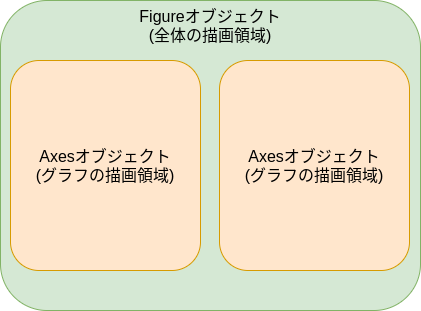

FigureオブジェクトおよびAxesオブジェクトを生成する方法はいくつかありますが、本節では `subplots` 関数を利用する方法を紹介します。次のコードでは `subplots` 関数を実行してFigureオブジェクトとそれに属するAxesオブジェクトを生成しています。Notebook(Colab)から実行すると、Notebookにグラフが描画されます。

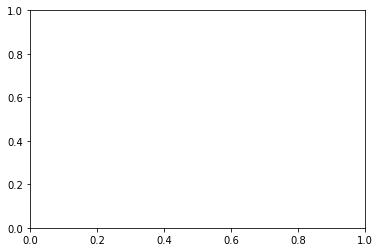

In [1]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

描画領域を複数生成するには、 `subplots` 関数の引数 `nrows` に行数、引数 `ncols` に列数を渡します。次のコードでは1行2列のAxesオブジェクトを生成しています。Figureオブジェクト（ `fig` ）の `suptitle` メソッドはFigureのタイトル、Axesオブジェクトの `set_title` メソッドではAxesオブジェクト（ `ax` ）のタイトルを設定しています。

Text(0.5, 1.0, 'axes1')

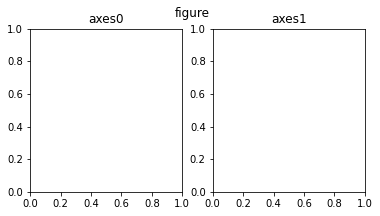

In [2]:
fig, ax = plt.subplots(ncols=2, figsize=(6, 3))
fig.suptitle("figure")
ax[0].set_title("axes0")
ax[1].set_title("axes1")

これまでのコードでは描画領域を生成しただけで、グラフを描画していません。グラフを描画するにはAxesオブジェクトからグラフを描画するメソッドを実行します。次のコードでは `hist` メソッドを実行して、ヒストグラムを描画しています。 `hist` メソッドの引数にはリストや `numpy.ndarray` などの1次元のデータを渡します。今回使用したデータはNumPyの `random.randn` 関数を利用して、正規分布に従う乱数（平均値=0, 標準偏差=1）を10000個生成しています。

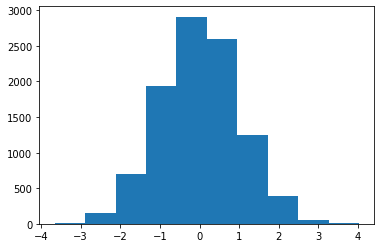

In [3]:
import numpy as np

np.random.seed(1)
norm_arr = np.random.randn(10000) # 正規分布に従う乱数を生成
fig, ax = plt.subplots()
ax.hist(norm_arr);

Axesオブジェクトには `hist` メソッドのほか、さまざまなグラフを描画するメソッドが用意されています。詳細については公式ドキュメント ^1 を参照してください。

^1 https://matplotlib.org/3.2.1/api/axes_api.html#plotting

描画領域にグラフを重ねて描画するには、Axesオブジェクトからグラフを描画するメソッドを複数実行します。次のコードではヒストグラムに分布を近似した折れ線グラフを重ねて描画しています。

 `plot` メソッドは折れ線グラフを描画します。 `plot` メソッドの第1引数にはX値、第2引数にはY値を渡します（①）。折れ線グラフのX値にはNumPyの `linspace` 関数を利用して、-4から4まで、100個の等差数列を生成しています（②）。Y値にはSciPyの `norm.pdf` メソッドでX値に対する確率密度関数を利用した標準正規分布の近似値を算出しています。`norm.pdf` メソッドの第1引数に元データの配列、第2引数に平均値、第3引数に標準偏差を渡します（③）。 `hist` メソッドの引数 `bins` にヒストグラムのビン数を指定でき、引数 `density` に `True` を渡すと相対度数としたヒストグラムになります（④）。

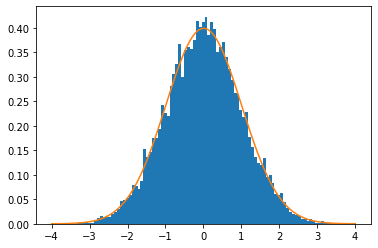

In [4]:
from scipy.stats import norm

x = np.linspace(-4, 4, 100)  # ②
y = norm.pdf(x, norm_arr.mean(), norm_arr.std())  # ③
fig, ax = plt.subplots()
ax.hist(norm_arr, bins=100, density=True)  # ④
ax.plot(x, y) # ①

複数の描画領域にグラフを描画するには、それぞれのAxesオブジェクトからグラフを描画するメソッドを実行します。

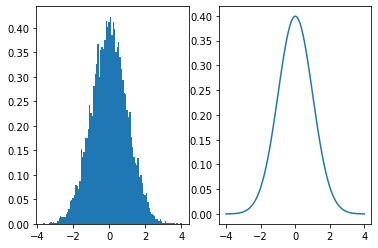

In [5]:
fig, ax = plt.subplots(ncols=2)
ax[0].hist(norm_arr, bins=100, density=True)
ax[1].plot(x, y) 

### seabornを利用した可視化

seabornは、Matplotlibをベースにした可視化を実現するパッケージです。次のようなデータサイエンスの分野ではよく使われる可視化手法を簡潔な記述で実装できるのが特徴です。

- カテゴリデータを分類した可視化
- データの関係を可視化
- データの分布を可視化
- 回帰を可視化

次のコードではseabornの `distplot` 関数を利用して分布を可視化しています。ヒストグラムに加え、カーネル密度推定したグラフが描画されます。 `distplot` 関数の第1引数には描画対象のリストや `numpy.ndarray` などの1次元のデータを渡します。

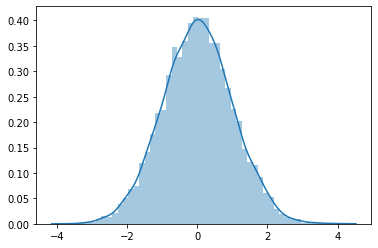

In [6]:
import seaborn as sns

sns.distplot(norm_arr)

これまでの可視化処理では次のような工程を行っていましたが、seabornを利用することで一度に行えます。

1. ヒストグラムの描画
2. 等差数列の配列を生成
3. 2を元にした確率密度関数によるデータを生成
4. 2と3のデータを折れ線グラフに描画

`distplot` 関数はAxesオブジェクトを返します。従って、前項と同様にMatplotlibで生成したAxesオブジェクトに対しての可視化が行えます。次のコードでは `distplot` 関数にさまざまな引数を渡したグラフを2つの描画領域に描画しています。

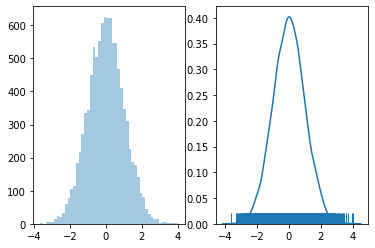

In [7]:
fig, ax = plt.subplots(ncols=2)
# カーネル密度推定をしない
sns.distplot(norm_arr, ax=ax[0], kde=False)
# ヒストグラムを描画しない, ラグプロットを描画する
sns.distplot(norm_arr, ax=ax[1], hist=False, rug=True)